In [1]:
%config Completer.use_jedi = False

## `1.2 베이지안 프레임워크`
- 사후확률(posterior probability)은 곡선으로 표시되고, 불확실성은 곡선의 너비에 비례함

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats

matplotlib.rc('font', family='Malgun Gothic')
figsize(8, 8)

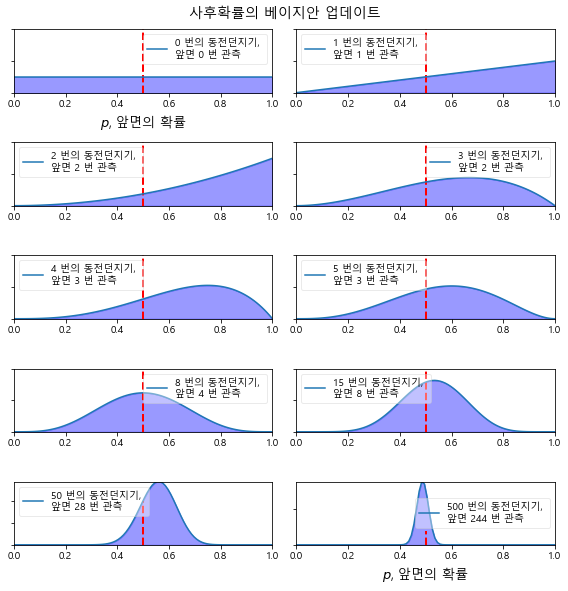

In [3]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100) # (시작점, 끝점, 총숫자) 만큼 공간 생성

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k+1)
    plt.xlabel('$p$, 앞면의 확률', fontsize=13) if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1+heads, 1+N-heads)
    plt.plot(x, y, label=f'{N} 번의 동전던지기, \n앞면 {heads} 번 관측')
    plt.fill_between(x, 0, y, color='blue', alpha=0.4)
    plt.vlines(0.5, 0, 4, color='red', linestyles='--', lw=2)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle('사후확률의 베이지안 업데이트', y=1.02, fontsize=14)
plt.tight_layout()

- 데이터가 누적될 수록 p=0.5일 확률이 점점 더 커짐


### 1.2.2 농부와 사서

- 스티브가 사서인 사건을 $P(A)= 1/21 =0.047$, 이것이 사전확률. 이웃에게 그에 대한 정보를 얻었다고 하고 이것을 $X$라고 함.
- 우리의 목적은 $P(A|X)$를 아는 것.

$P(A|X)= \frac{P(X|A)P(A)}{P(X)}$
- 우리는 $P(A)$를 알고 있지만, $P(X|A)$를 알 수 없음. 이 값은 스티브가 사서라는 전제 하에 이웃이 스티브를 설명할 확률로 정의 가능. 0.95 라고 가정
- $P(X)$는 누군가가 이웃이 스티브를 설명한대로 진술할 가능성. 현재 상황에서 추정하기 어렵지만 다음과 같이 몇가지 논리를 재구축 가능
    - $P(X)=P(X~and~A)+P(X~and\sim A)=P(X|A)P(A)+P(X|\sim A)P(\sim A)$ 
    - 여기서 $P(\sim A)=1-P(A)=20/21$, 이제 $P(X|\sim A)$ 필요. 이는 스티브가 농부라는 전제로 이웃이 스티브를 설명한 내용 X의 확률. 이를 0.5라고 가정하면 $P(X)=0.95 \times (1/21)+0.5 \times (20/21) = 0.52$
    
위의 식에 전부 대입하여 계산하면 확률은 0.087
- 값이 크지는 않지만 농부가 사서보다 얼마나 더 많은지를 생각하면 논리적으로 타당함. 아래 그림을 통해 스티브가 사서일 경우와 농부일 경우의 사전확률과 사후확률 비교 가능

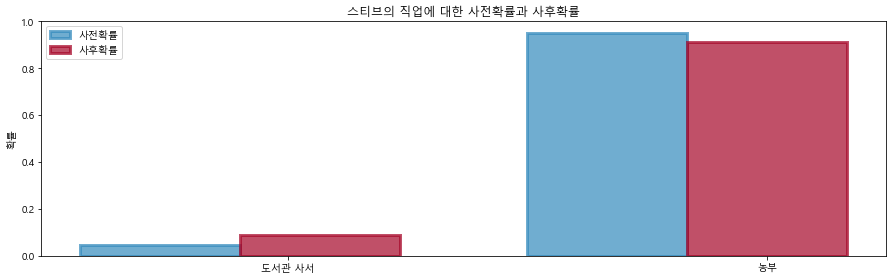

In [4]:
%matplotlib inline

plt.subplots(figsize=(12.5, 4))
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ['#348ABD', '#A60628']
prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]

plt.bar([0, .7], prior, alpha=0.7, width=0.25, color=colors[0], label='사전확률', lw='3', edgecolor=colors[0])
plt.bar([0+0.25, .7+.25], posterior, alpha=0.7, width=0.25, color=colors[1], label='사후확률', lw='3', edgecolor=colors[1])

plt.xticks([0.2, 0.95], ['도서관 사서', '농부'])
plt.title('스티브의 직업에 대한 사전확률과 사후확률')
plt.ylabel('확률')
plt.legend(loc='upper left')
plt.tight_layout()

- 주목할 점은 우리가 X를 관측한 후 스티브가 사서일 확률이 많이는 아니지만 높아졌다는 점
- 그러나 아직까지 스티브가 농부일 확률이 압도적으로 높음

</br></br>
## `1.3 확률분포`

### 1.3.1. 이산적(포아송)
$$P(Z=k)=\frac{\lambda ^k e ^{-\lambda}}{k!}, k=0,1,2, \cdots$$


- 포아송 분포에서 $\lambda$는 분포의 모수이며 분포 모양을 결정함. 포아송분포에서 $\lambda$는 양수. $\lambda$를 늘리면 큰 값에 더 많은 확률을 부여하고, 역으로 $\lambda$를 줄이면 작은 값에 더 많은 확률을 부여함. $\lambda$는 포아송 분포의 밀도를 나타냄
- 양수인 $\lambda$와 달리 포아송분포의 k는 음수가 아닌 정수여야 함. 이는 매우 중요한데, 인구 모델을 구하는 경우 4.25명이나 5.612명 같은 인구는 이치에 맞지 않기 때문
- 포아송 분포의 유용한 속성 한 가지는 그 기댓값이 모수와 같다는 점. 
    - $E[Z| \lambda ]= \lambda $

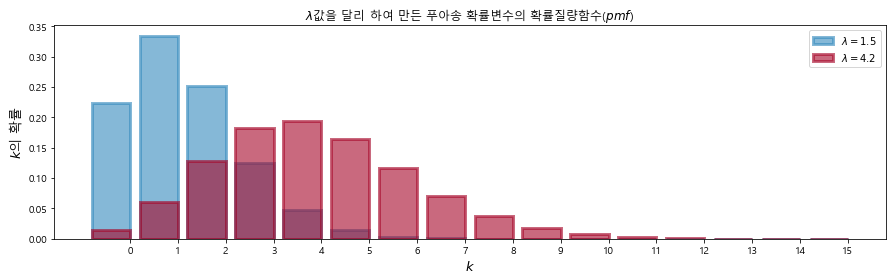

In [5]:
%matplotlib inline

plt.subplots(figsize=(12.5, 4))

a = np.arange(16)  # array([ 0, ..., 15])
poi = stats.poisson
lambdas = [1.5, 4.25]  # 푸아송분포의 lambda
colors = ['#348ABD', '#A60628']

for lambda_, color in zip(lambdas, colors):
    plt.bar(a, poi.pmf(a, lambda_), color=color, 
        label='$\lambda={:.1f}$'.format(lambda_), 
        alpha=0.60, edgecolor=color, lw='3')
    
plt.xticks(a+0.4, a)
plt.legend()
plt.ylabel('$k$의 확률', fontsize=13)
plt.xlabel('$k$', fontsize=13)
plt.title('$\lambda$값을 달리 하여 만든 푸아송 확률변수의 확률질량함수($pmf$)')
plt.tight_layout()

### 1.3.2. 연속적(지수)
$$f_Z(z|\lambda)=\lambda e^{-\lambda z}, z\geq0$$
- 지수확률변수는 포아송 확률변수처럼 오직 음이아닌 값만 가짐. 그러나 지수는 포아송변수와 달리 4.25나 5.6712같은 정수가 아닌 값을 포함하여 음이 아닌 양수를 가짐
- 확률변수 Z가 모수인 $\lambda$인 지수분포를 따른다면 Z는 지수적이라고 하며, 아래처럼 나타냄

$Z\sim Exp(\lambda)$

- 특정 $\lambda$가 주어졌을 때 지수확률변수의 기댓값은 $\lambda$의 역수임.

$E[Z|\lambda] = \frac 1 \lambda$

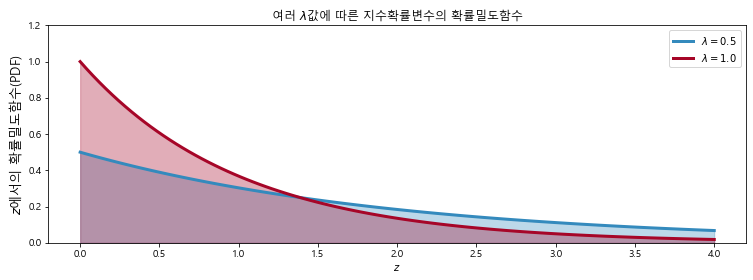

In [6]:
%matplotlib inline

plt.subplots(figsize=(12.5, 4))

a = np.linspace(0, 4, 100)
expo = stats.expon
# lambda_ = [0.5, 1]
lambda_ = [0.5, 1]
colors = ['#348ABD', '#A60628']

for l, c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3, color=c, 
             label='$\lambda = %.1f$' % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)
    
    plt.legend()
    plt.ylabel('$z$에서의 확률밀도함수(PDF)', fontsize=13)
    plt.xlabel('$z$')
    plt.ylim(0, 1.2)
    plt.title('여러 $\lambda$값에 따른 지수확률변수의 확률밀도함수')

### 1.3.3. $\lambda$ 란 무엇인가?

- 실제 $\lambda$는 숨겨져 있음. 오직 Z만 볼 수 있으므로, 숨겨진 $\lambda$를 알아내야 함. Z와 $\lambda$는 일대일대응이 아니라 어려움
- $\lambda$를 추정하는 방법이 많이 만들어졌지만, 실제 관측되지 않으므로 어떤 방법이 최고인지 확신할 수 없음
- 우리는 $\lambda$를 정확하게 추측하기보다 $\lambda$에 확률분포를 부여하여 $\lambda$가 무엇일 것 같다고 이야기할 수 있음
- $\lambda$는 고정된 값. 난수가 아님.

</br></br>
## `1.4 컴퓨터를 사용하여 베이지안 추론`

### 1.4.1. 예제: 문자 메시지 데이터에서 행동 추론
- 매일 주고 받은 문자메시지를 가지고 있음. 사용자의 메세지 습관이 시간별로 서서히 변하는지 갑자기 급변하는지 알고싶은 상황

In [7]:
count_data = np.loadtxt('txtdata.txt')
n_count_data = len(count_data)

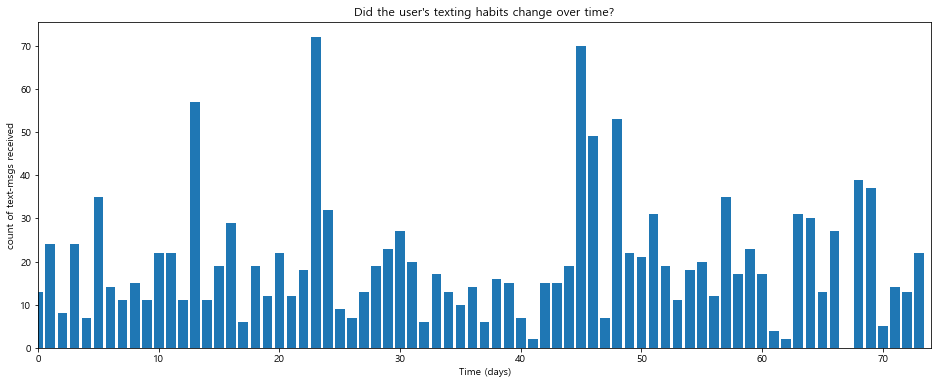

In [10]:
plt.subplots(figsize=(16,6))
plt.bar(np.arange(n_count_data), count_data)
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

- 주어진 시간 동안 행동의 변화가 일어났다고 말할 수 있을까?
- 앞에서 본 것처럼 포아송 확률변수는 이런 종류의 개수 데이터에 적합함. 특정 일자 $i$의 메세지 개수는 $C_i$로 표시됨.


$$C_i \sim Poi(\lambda)$$


- 그러나 우리는 모수 $\lambda$의 값이 실제로 무엇인지 모름. 그림을 보면 관측기간 마지막에 높아 보임. 이는 관측기간 중 어느 시점에서 $\lambda$가 증가한다는 의미와 같음
- 높은 $\lambda$값이 더 큰 결과에 더 많은 확률을 부여함(어느 특정한 날 메시지를 많이 받을 확률이 높음)


- 이런 관측을 수학적으로 나타낼 수 있음. 관측기간 중 어느날($\tau$) 모수 $\lambda$가 값자기 더 높은 값으로 확 뛰어오른다고 가정.
- 그러면 우리는 모수 $\lambda$를 두 개 가짐. 하나는 $\tau$ 이전, 또 하나는 나머지 관측기간 동안의 것. 이러한 급작스러운 변화를 `switchpoint(변환점)`라고 함


- $\lambda_1$과 $\lambda_2$에 대한 바람직한 사전확률 분포를 찾아야 함.
- $\lambda$는 임의의 양수여야 한다는 점을 상기한다면, 지수분포는 양수에 대해 연속밀도함수를 제공하므로 $\lambda_i$를 모델링하기에 적합한 선택
- 그러나 지수분포는 그 자체의 모수를 가지고 있다는 점을 상기하여, 모델에 그 모수를 포함시켜야 함. 그 모수를 $\alpha$라고 하자.


$$\lambda_1 \sim Exp(\alpha)$$
$$\lambda_2 \sim Exp(\alpha)$$


- $\alpha$는 `hyperparameter`라고 함. 말 그대로 다른 모수에 영향을 주는 모수. $\alpha$에 대한 초기 추측이 모델에 크게 영향을 미치지 않아 우리는 어느 정도 유연성 있는 선택 가능.
- 우리는 모델에서 이 모수 $\alpha$를 지나치게 고집하지 않음. $\alpha$를 개수 데이터 평균의 역수가 되도록 설정할 것을 제안함. 왜냐하면 지수분포를 사용해 $\lambda$를 모델링하기 때문.
- 앞서 보여준 기댓값을 사용하여 다음과 같은 식을 얻을 수 있음


$$\frac 1 N \sum_{i=0}^{N}{C_i} \approx E[\lambda | \alpha] = \frac 1 {\alpha} $$


- 이 값을 사용함으로써 사전확률을 너무 고집하지 않고, 하이퍼 파라미터의 영향력을 최소화 함. 권장하는 방법은 $\lambda_i$마다 하나씩, 사전확률을 두 개 갖는 것.
- 다른 $\lambda_i$ 값을 가진 지수분포 두 개 를 만드는 것은 관측기간 중 어느시점에서 비율이 변했다는 우리의 믿음을 반영하는 것


- $\tau$가 발생할 경우 데이터 노이즈 때문에 사전확률을 알아내기 어려움. 대신 우리는 모든 날이 획일적인 사전 믿음을 할당 가능함.


$$\tau \sim DiscreteUniform(1,70) => P(\tau=k) = \frac 1 {70}$$

### 1.4.2. pymc3

- 본 교재는 pymc지만 pymc3 버전으로 수정해보자
- pymc3는 베이지안 분석을 위한 라이브러리.

In [11]:
import pymc3 as pm

with pm.Model() as model:
    alpha = 1.0/count_data.mean()

    lambda_1 = pm.Exponential('lambda_1', alpha)
    lambda_2 = pm.Exponential('lambda_2', alpha)

    tau = pm.DiscreteUniform('tau', lower=0, upper=n_count_data)

- $\lambda_1$ $\lambda_2$에 해당하는 변수를 만듦. 그리고 stochastic variables(확률론적 변수)에 변수를 할당함. 이렇게 얘기하는 이유는 뒷단에서 난수 발생기로 처리되기 때문
- 훈련 단계를 거치면서 더 좋은 tau 값을 찾게 됨

In [15]:
count_data

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

In [12]:
with model:
    idx = np.arange(n_count_data)
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2) # tau까지의 lambda_ 값은 lambda_1이고 그 이후는 lambda_2 할당

In [16]:
with model:
    observation = pm.Poisson('obs', lambda_, observed=count_data) # data를 결합함

- MCMC(Markov Chain Monte Carlo)를 활용하여 모델 생성. 이 기법은 $\lambda_1$과 $\lambda_2$ 그리고 $\tau$의 사후확률분포로부터 수천 개의 확률변수를 반환함.
- 확률변수들의 히스토그램을 그려보면 사후확률분포가 어떻게 생겼는지 볼 수 있음.

In [17]:
### 챕터 3장에서 설명할 코드
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 346 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [18]:
# 40000개 샘플링
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

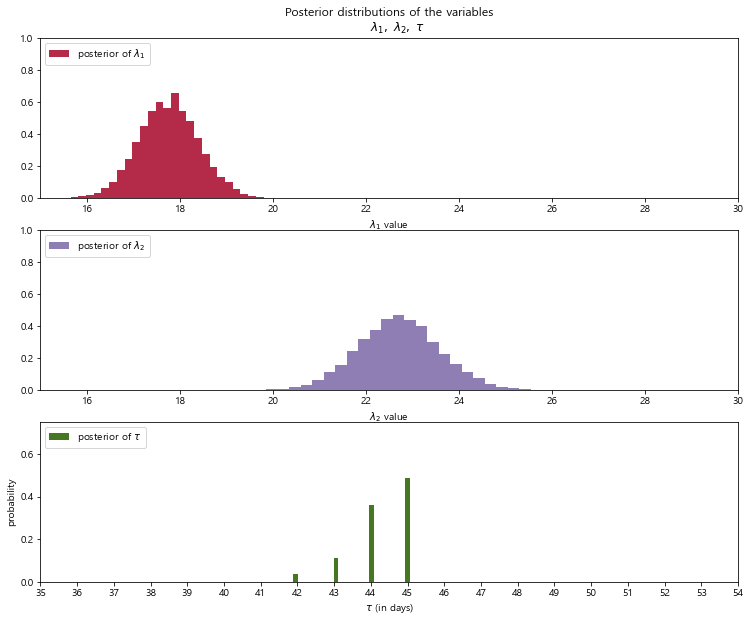

In [28]:
figsize(12.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False) # y축 자동 크기조정 설정 끔

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85, label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, label=r"posterior of $\tau$", color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

### 1.4.3. 해석
- 베이지안 방법론은 분포를 반환함. 따라서 우리는 미지의 $\lambda$와 $\tau$를 표현할 분포를 가지게 됨. 위의 추정에서 불확실성을 볼 수 있음. 분포가 넓은 것은 사후 믿음이 확실하지 않다는 것.
- 또한, 타당한 모수가 무엇인지 알 수 있음. $\lambda_1$은 약 18, $\lambda_2$는 약 23인데, 두 $\lambda$의 사후확률분포가 명확하게 구분되며, 사용자의 문자 습관에 변화가 있었을 가능성이 크다는 것.


- 또한, 이들 변수에 대한 사전확률분포가 지수적이라해도 $\lambda$에 대한 사후확률분포가 지수분포처럼 보이지 않는다는 것을 명심.
- 사실 사후확률분포는 우리가 원래 모델에서 본 어떤 형태와도 다름.
- 우리가 한 분석은 $\tau$의 분포를 반환함. 그 사후확률분포는 이산확률변수이므로 나머지 두 개와 다름
- 45일 부근에서 사용자의 행동 패턴이 바뀔 확률이 50%임을 알 수 있음.
- 아무 변화가 없거나 시간에 따라 점진적으로 변한다면 $\tau$의 사후확률분포는 더욱 넓게 퍼져있을 것이고, 많은 날이 $\tau$의 후보가 됨. 실제 결과에서는 3~4일이 잠재적인 변환점이라고 보는 것이 타당해 보임


### 1.4.4. 사후확률분포에서 얻은 표본의 좋은 점
- 사후확률 표본을 사용하여, 't시점의 문자 메시지 개수의 기댓값'을 계산함.
- 포아송 변수의 기댓값은 그 분포의 모수 $\lambda$와 같다는 점을 기억한다면, 't시점에서의 $\lambda$의 기댓값은 무엇인지'와 같은 의미임.


- $t<\tau$면, $\lambda_i=\lambda_{1,i}$를 이용하여 모든 가능한 $\lambda_i$의 평균을 계산하고, 그렇지 않다면($t>\tau$) $\lambda_i=\lambda_{2,i}$를 이용함.

In [39]:
figsize(12.5, 5)

# tau_samples, lambda_1_samples, lambda_2_samples를 포함한 N개의 샘플
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)

for day in range(0, n_count_data):
    ix = day < tau_samples # 'day' 이전에 발생한 날의 bool index값
    # 각 사후확률분포의 표본은 tau값에 해당함. tau값은 변환점 이전인지(lambda_1) 이후인지(lambda_2)인지 가리킴
    # lambda_1/2의 사후확률분포 표본을 취함으로써 우리는 모든 표본을 평균하여 그날의 lambda 기댓값을 얻을 수 있음
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum())/N

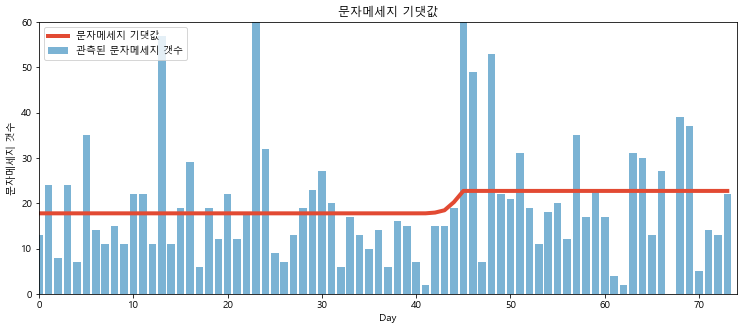

In [42]:
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33", label="문자메세지 기댓값")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("문자메세지 갯수")
plt.title("문자메세지 기댓값")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65, label="관측된 문자메세지 갯수")
plt.legend(loc="upper left")